两个矩阵A和B的矩阵乘法用A * B表示， 矩阵A的共轭转置用A'表示， 转置用A.'表示。 [A B C]表示三个矩阵横向合并， [A;B;C]表示三个矩阵纵向合并。 若x是向量， diagm(x)返回以x为主对角线元素的对角阵， 而Diagonal(x)返回带有特殊标志的对角阵。

A \ B表示求解线性方程组A x = B。 当 A 的行数超过列数时， 求最小二乘解。 当 A 的列数超过行数时， 可能有无穷多解， 这时返回其中长度最小的解。

统计计算中用到许多矩阵计算， 高效、精确的矩阵计算常常需要通过矩阵的三角分解、正交-三角分解等实现。 当 A 为方阵时， lu(A)将矩阵 A 分解成 A=PLU 形式， 其中 P 是置换阵(permutation matrix)，  L 是下三角阵，  U 是上三角阵。 设结果为res， 则三个部分分别用res.P, res.L, res.U访问。 置换阵res.P还可以用一维数组res.p表示

In [2]:
A1 = [1 -2 2; 1 -1 2; -1 1 1]

3×3 Matrix{Int64}:
  1  -2  2
  1  -1  2
 -1   1  1

In [3]:
using LinearAlgebra
res1 = LinearAlgebra.lu(A1)
res1.L

3×3 Matrix{Float64}:
  1.0   0.0  0.0
  1.0   1.0  0.0
 -1.0  -1.0  1.0

In [4]:
res1.U

3×3 Matrix{Float64}:
 1.0  -2.0  2.0
 0.0   1.0  0.0
 0.0   0.0  3.0

In [5]:
res1.P

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

In [6]:
res1.p

3-element Vector{Int64}:
 1
 2
 3

对矩阵 A ， qr(A)可以做QR分解 A=QR ， qr(A, true)可以做带枢轴量的QR分解 A=PQR ， 如果结果为res， 则各个部分用res.P, res.Q, res.R访问， 置换阵res.P还可以用res.p，一个一维向量表示。

用eigen(A)可以求方阵A的特征值分解， 如果结果为res，则res.values为特征值，是复数向量； res.vectors返回各列为特征向量的矩阵， inv(res), det(res), isposdef(res)可以从分解结果中提取信息。 如

In [7]:
res2 = eigen(A1)
res2.values

3-element Vector{ComplexF64}:
 -0.28737153694351075 - 1.349996398003656im
 -0.28737153694351075 + 1.349996398003656im
   1.5747430738870216 + 0.0im

In [8]:
res2.vectors

3×3 Matrix{ComplexF64}:
   0.783249-0.0im         0.783249+0.0im       0.237883+0.0im
   0.493483+0.303862im    0.493483-0.303862im  0.651777+0.0im
 -0.0106833-0.22483im   -0.0106833+0.22483im   0.720138+0.0im

对称阵（或厄米特阵）的特征值都是实数， 其计算更快。 因为数值误差的关系， 有些对称阵可能保存起来已经不对称， 这时可以用Symmetric(A)将A转换为对称阵， 用Hermitian(A)将A转换为厄米特阵。

向量化与循环

In [9]:
function vecadd1(a,b,c,N)
    for i = 1:N
     c = a + b
    end
   end
   
   function vecadd2(a,b,c,N)
    for i = 1:N
     c .= a .+ b
    end
   end
   
   function vecadd3(a,b,c,N)
    for i = 1:N, j = 1:length(c)
     c[j] = a[j] + b[j]
    end
   end

vecadd3 (generic function with 1 method)

以上的三个函数都是将向量a与向量b相加赋给向量c， 并重复N次。 第一个版本用了向量化的做法， 第二个版本用了加点格式的向量化做法， 第三个版本是显式循环。 

In [10]:
A = rand(2); B = rand(2); C = zeros(2);

@elapsed vecadd1(A,B,C,10);
@elapsed vecadd2(A,B,C,10);
@elapsed vecadd3(A,B,C,10);

In [11]:
@elapsed vecadd1(A,B,C,10_000_000)

0.4042055

In [12]:
@elapsed vecadd2(A,B,C,10_000_000)

0.0335335

In [13]:
@elapsed vecadd3(A,B,C,10_000_000)

0.0287626

随机数发生器与统计分布

Julia语言的标准库Random包提供了rand函数和randn等函数。 rand(n)返回n个标准均匀分布U(0,1)随机数， 类型是Float64的一维数组， 无自变量的rand()调用返回一个U(0,1)随机数。 randn(n)和randn()产生标准正态分布的随机数。

Random.seed!(rng, seed)可以设置种子。 为了能够保证模拟的结果可重复， 需要在模拟开始之前设置种子。 但是，随着Julia版本的升级， 随机数种子和随机数生成器可能会改变， 如果特别需要模拟研究结果完全可重复， 可以将生成的模拟样本都备份保存下来。

加载Distributions包后可以生成其它分布的随机数， 为Base的rand函数增加了方法， 还提供了各种与分布的有关函数。

产生随机数的函数调用格式为 rand(distribution, n)或rand(distribution)， 其中distribution是一个分布，用函数调用表示， 比如标准正态分布用Normal()表示， N(10,22) 用Normal(10,2)表示。 用Random.seed!(rng, k)设定一个随机数种子序号， 这样可以在模拟时获得可重复的结果。 比如，生成100个Possion(2)分布随机数:

In [14]:
using Random, Distributions
Random.seed!(101)
y = rand(Poisson(2), 100);

In [16]:
using StatsBase
using DataFrames
tab11 = combine(groupby(DataFrame(y=y), :y), df -> DataFrame(count=size(df, 1)))
sort!(tab11)

,y,count
,Int64,Int64
1,0,10
2,1,30
3,2,28
4,3,25
5,4,5
6,5,2


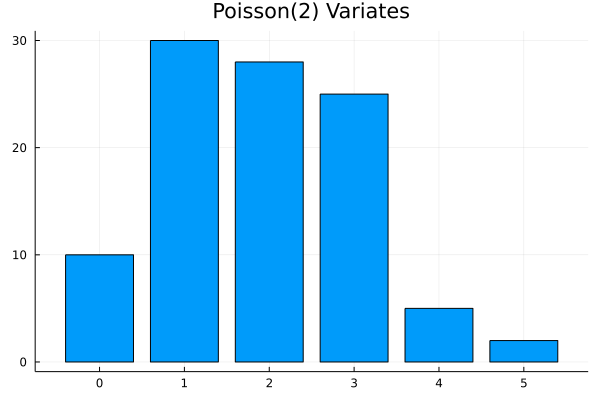

In [17]:
using Plots; Plots.gr()
using StatsPlots
@df tab11 Plots.bar(:y, :count, 
    title="Poisson(2) Variates", 
    xticks=0:7,
    legend=false)

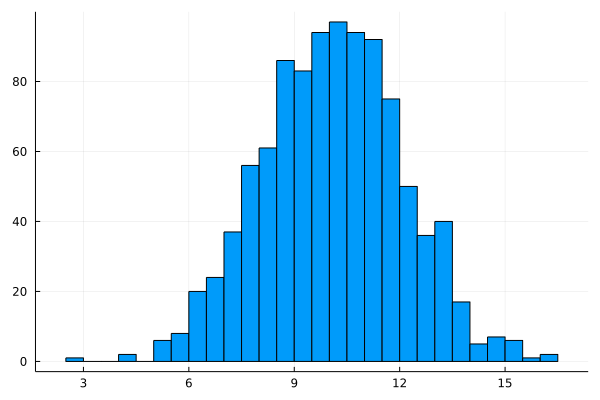

In [18]:
Random.seed!(101)
y = rand(Normal(10, 2), 1000);
Plots.histogram(y, nbins=30, legend=false)

随机抽样

StatsBase.sample(x,n)函数可以从一列值x中随机有放回抽取n个值。 加replace=false作无放回抽样。

In [19]:
StatsBase.sample(1:10, 5, replace=false)

5-element Vector{Int64}:
 2
 8
 4
 9
 6

In [20]:
StatsBase.sample(1:10, StatsBase.Weights([ones(5); 4 .* ones(5)]), 5; replace=false)

5-element Vector{Int64}:
  5
 10
  7
  4
  6

In [21]:
quantile.(Normal(10, 2), [0.5, 0.975])

2-element Vector{Float64}:
 10.0
 13.919927969080115

In [22]:
10 .+ 2 .* quantile.(Normal(), [0.5, 0.975])

2-element Vector{Float64}:
 10.0
 13.919927969080115

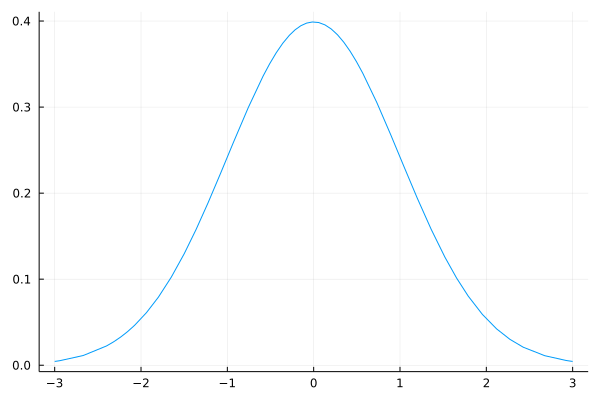

In [23]:
using Plots; Plots.gr()
Plots.plot(x -> pdf(Normal(), x), -3, 3, legend=false)

In [24]:
Random.seed!(101); x=rand(Normal(10, 2), 30)
fit(Normal, x)

Normal{Float64}(μ=9.903033995978664, σ=2.237003990130135)

In [25]:
fit_mle(Normal, x)

Normal{Float64}(μ=9.903033995978664, σ=2.237003990130135)

Optim包的optimize()函数类似于R的optim()， 可以用来求多元函数的无约束极值或矩形约束的极值， 一元函数区间内的极值， 复函数极值, 流形上的极值。

- NelderMead ()，是不依赖梯度信息的单纯型方法，只需要目标函数本身；
- BFGS (), LBFGS(), 这是著名的拟牛顿法, LBFGS() 是内存开销有限版本;
- Con jugategradient (), 共轭梯度法;
- GradientDescent (), 最速下降法，还有 MomentumGradientDescent (), AcceleratedGradientDescent ();
- Newton ()，牛顿法，需要梯度函数与海色阵函数，海色阵函数不可省略，还有 NewtonTrustRegion ()，此方法克服了当函 数不能用二次多项式近似时的困难；
- SimulatedAnnealing ()，模拟退火法，用于求解全局最值，只需要目标函数本身，速度慢。SAMIN()，ParticleSwarm() 是 类似方法;
- Fminbox ()，矩形约束的优化;
- IPNewton () 为非线性约束的内点法加牛顿法;
- Brent () 和 GoldenSection () 为一元函数优化;

考虑二元函数  f(x,y)=(x−a)2+b(y−x2)2 的最小值问题。 显然唯一的最小值点为 (a,a2) 。 用Optim的optimize()函数进行数值求解。 这个二元函数的最小值点很长、很窄、底部平坦的山谷内， 对迭代算法来说有一定困难。 取 a=1,b=100 ， 最小值点在 (1,1) 。 取初值为 (0,0) 。

In [26]:
function rb(x::Vector{Float64})
    return (1.0 - x[1])^2 + 100.0 * (x[2] - x[1]^2)^2;
  end

rb (generic function with 1 method)

In [27]:
using Optim
ores1 = optimize(rb, [0.0, 0.0])

 * Status: success

 * Candidate solution
    Final objective value:     3.525527e-09

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    60
    f(x) calls:    117


可以看出在没有选用具体优化方法的情况下用了Nelder-Mead方法， 迭代了60次，找到的最小值点的误差在 10−4 以下。

改用BFGS方法，使用数值微分计算梯度

In [28]:
ores1b = optimize(rb, [0.0, 0.0], BFGS())

 * Status: success

 * Candidate solution
    Final objective value:     5.471408e-17

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 3.47e-07 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.47e-07 ≰ 0.0e+00
    |f(x) - f(x')|         = 6.59e-14 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.20e+03 ≰ 0.0e+00
    |g(x)|                 = 2.33e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    16
    f(x) calls:    53
    ∇f(x) calls:   53


只迭代了16次，但是计算数值微分也会涉及到比较多的目标函数计算。 可以人为给出梯度函数：

In [29]:
function rb_grad!(G::Vector{Float64}, x::Vector{Float64})
    G[1] = -2.0 * (1.0 - x[1]) - 400.0 * (x[2] - x[1]^2) * x[1]
    G[2] = 200.0 * (x[2] - x[1]^2)
  end
  ores1c = optimize(rb, rb_grad!, [0.0, 0.0], BFGS())

 * Status: success

 * Candidate solution
    Final objective value:     7.645553e-21

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 3.48e-07 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.48e-07 ≰ 0.0e+00
    |f(x) - f(x')|         = 6.91e-14 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 9.03e+06 ≰ 0.0e+00
    |g(x)|                 = 2.31e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    16
    f(x) calls:    53
    ∇f(x) calls:   53


还可以由用户提供一个海色阵函数， 这时方法为牛顿法，调用如

optimize(rb, rb_grad!, rb_Hess!, [0.0, 0.0])
optimize()不会用数值微分法计算海色阵， 因为两次数值微分造成很大误差。 如果目标函数完全用Julia编写并且不调用C代码和Fortran代码， 则目标函数的梯度函数和海色阵函数很可能可以用符号计算方法获得精确函数。 将上述rb()函数去掉其中的声明才能做符号计算。 如

In [31]:
function rbsym(x)
    return (1.0 - x[1])^2 + 100.0 * (x[2] - x[1]^2)^2;
  end
  optimize(rbsym, [0.0, 0.0], Newton(); autodiff = :forward)

 * Status: success

 * Candidate solution
    Final objective value:     3.081488e-31

 * Found with
    Algorithm:     Newton's Method

 * Convergence measures
    |x - x'|               = 3.06e-09 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.06e-09 ≰ 0.0e+00
    |f(x) - f(x')|         = 9.34e-18 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 3.03e+13 ≰ 0.0e+00
    |g(x)|                 = 1.11e-15 ≤ 1.0e-08

 * Work counters
    Seconds run:   1  (vs limit Inf)
    Iterations:    14
    f(x) calls:    44
    ∇f(x) calls:   44
    ∇²f(x) calls:  14


optimize()支持比较简单的矩形约束优化， 所谓矩形约束(box constraint)， 是指每个坐标分量属于一个区间， 可以用Inf和-Inf表示无穷区间。 这种约束优化用的是简单的内点法

例如，上面的例子函数本来是无约束的， 但是如果我们要求解在矩形 [1.25,∞)×[−2.1,∞) 中， 这个范围已经不包含全局最小值点。 约束优化程序如下：

In [32]:
lower = [1.25, -2.1]
upper = [Inf, Inf]
initial_x = [2.0, 2.0]
inner_optimizer = GradientDescent()
ores2 = optimize(rb, rb_grad!, lower, upper, initial_x, 
    Fminbox(inner_optimizer))

 * Status: success

 * Candidate solution
    Final objective value:     6.250244e-02

 * Found with
    Algorithm:     Fminbox with Gradient Descent

 * Convergence measures
    |x - x'|               = 0.00e+00 ≤ 0.0e+00
    |x - x'|/|x'|          = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 0.0e+00
    |g(x)|                 = 3.12e-02 ≰ 1.0e-08

 * Work counters
    Seconds run:   1  (vs limit Inf)
    Iterations:    12
    f(x) calls:    258573
    ∇f(x) calls:   258573


optimize()的结果如果保存在res变量中， 可以用Optim.minimizer(res)获得最小值点（总是一个向量）， 用Optim.minimum(res)获得最小值。 结果中还有用于检查是否收敛的输出， 详见Optim包的文档。 控制迭代精度等选项， 可以使用optimize()的控制选项，如

In [33]:
optimize(rb, rb_grad!, [0.0, 0.0],
    GradientDescent(),
    Optim.Options(g_tol = 1e-12,
        iterations = 10,
        store_trace = true,
        show_trace = false))

 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     3.959488e-01

 * Found with
    Algorithm:     Gradient Descent

 * Convergence measures
    |x - x'|               = 7.94e-03 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.13e-02 ≰ 0.0e+00
    |f(x) - f(x')|         = 7.27e-03 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.84e-02 ≰ 0.0e+00
    |g(x)|                 = 1.16e+00 ≰ 1.0e-12

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    10
    f(x) calls:    34
    ∇f(x) calls:   34


一元函数优化

optimize()也可以对一个一元函数在给定的区间内求极值， 可用方法有Brent()和GoldenSection()。

In [34]:
funi(x) = 2x^2 + 3x + 1
optimize(funi, -10, 10)

Results of Optimization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [-10.000000, 10.000000]
 * Minimizer: -7.500000e-01
 * Minimum: -1.250000e-01
 * Iterations: 5
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.5e-08*|x|+2.2e-16): true
 * Objective Function Calls: 6

**JuMP包**

JuMP可以看成是一个前端工具， 为了使用JuMP包， 需要安装JuMP包， 还要单独安装所需要用的求解包， 这些包有的需要调用二进制代码库， 好在Windows和OS X上有的库已经提供了编译好的包下载， Linux可以从源程序编译。

比如，GLPK提供了线性规划(LP)和混合整数线性规划(MILP)功能， 用

In [35]:
using JuMP
using GLPK

In [36]:
omod21 = Model(with_optimizer(GLPK.Optimizer))

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: GLPK

下面指定自变量以及自变量取值区间：

In [37]:
@variable(omod21, 0 <= x <= 2 );
@variable(omod21, 0 <= y <= 30 );

指定目标函数以及要求最大化还是最小化：

In [38]:
@objective(omod21, Max, 5x + 3*y )

5 x + 3 y

指定一个线性约束：

In [39]:
@constraint(omod21, con, 1x + 5y <= 3.0 )

con : x + 5 y <= 3.0

显示目前的模型：

In [41]:
print(omod21)

Max 5 x + 3 y
Subject to
 con : x + 5 y <= 3.0
 x >= 0.0
 y >= 0.0
 x <= 2.0
 y <= 30.0


以上完成了对一个优化问题的描述， 保存在变量omod21中。 用JuMP.optimize!(model)函数调用后端的优化程序库求解：

In [42]:
JuMP.optimize!(omod21)

求解结束后，结果也保存在模型变量omod21中。 求解结束可能处于如下状态：

求出最优解，或者证明无解；
因数值计算问题不能继续，或者迭代次数超界或者运算时间超界而停止。

In [43]:
println(termination_status(omod21))

OPTIMAL


这个状态的表示找到了最优解。 对线性规划问题， 还可以检查是否找到了primal-dual对， 即可行解集与对偶的零对偶间隙(zero duality gap):

In [44]:
println(primal_status(omod21))
println(dual_status(omod21))

FEASIBLE_POINT
FEASIBLE_POINT


In [45]:
println("最大目标函数值：", objective_value(omod21))

最大目标函数值：10.6


In [46]:
println("最大值点：x=", value(x), " y=", value(y))


最大值点：x=2.0 y=0.2



非线性规划

这里给一个利用JuMP调用Ipopt后端的例子。 Ipopt是一个开源的C++非线性最优化库。

考虑二元函数 (1−x)2+100∗(y−x2)2 的无约束最小值问题。 程序如下：

这里给一个利用JuMP调用Ipopt后端的例子。 Ipopt是一个开源的C++非线性最优化库


In [47]:
using JuMP
using Ipopt

建立模型：

In [48]:
omod22 = Model(with_optimizer(Ipopt.Optimizer))

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: Ipopt

In [49]:
@variable(omod22, x, start = 0.0);
@variable(omod22, y, start = 0.0);

定义目标函数，选择最小化：

In [50]:
@NLobjective(omod22, Min, (1 - x)^2 + 100 * (y - x^2)^2)


In [51]:
print(omod22)

Min (1.0 - x) ^ 2.0 + 100.0 * (y - x ^ 2.0) ^ 2.0
Subject to


In [52]:
optimize!(omod22)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equal

上面的显示已经表明找到了最优解。 用termination_status(omod21)查询算法退出状态

In [53]:
println(termination_status(omod22))

LOCALLY_SOLVED


In [54]:
println("最小化目标函数值=", objective_value(omod22))
println("最小值点：x = ", value(x), " y = ", value(y))

最小化目标函数值=1.3288608467480825e-28
最小值点：x = 0.9999999999999899 y = 0.9999999999999792


增加一个简单的线性约束 x+y=10 ， 重新求解：


In [55]:
@constraint(omod22, x + y == 10)
optimize!(omod22);

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

In [56]:
println(termination_status(omod22));
println("最小化目标函数值=", objective_value(omod22))
println("最小值点：x = ", value(x), " y = ", value(y))

LOCALLY_SOLVED
最小化目标函数值=2.89460755048946
最小值点：x = 2.701147124098218 y = 7.2988528759017814


考虑目标函数在简单约束 x≥1.25 ,  y≥−2.1 下的优化

In [57]:
using JuMP
using Ipopt
omod23 = Model(with_optimizer(Ipopt.Optimizer));
@variable(omod23, x, start = 0.0);
@variable(omod23, y, start = 0.0);
@constraint(omod23, x >= 1.25);
@constraint(omod23, y >= -2.1);
@NLobjective(omod23, Min, (1 - x)^2 + 100 * (y - x^2)^2);
optimize!(omod23);

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        2
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        2
        inequality constraints with only lower bounds:        2
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

In [58]:
println("约束最小化目标函数值=", objective_value(omod22))
println("约束最小值点：x = ", value(x), " y = ", value(y))

约束最小化目标函数值=2.89460755048946
约束最小值点：x = 1.2499999925568486 y = 1.5624999813819718


方程求根

Roots包提供了一元方程求根算法， 主要是二分法之类不依赖于导数的方法。 比如，如下的一元函数
f(x)=sin(4(x−0.25))+x+x20−1, x∈[0,1]
 
有唯一一个实根。函数图形如下

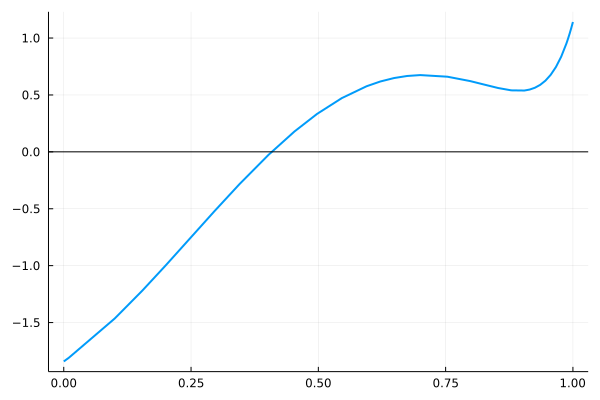

In [59]:
using Plots; Plots.gr()
rf1(x) =  sin(4.0*(x - 0.25)) + x + x^20 - 1.0
Plots.plot(rf1, 0.0, 1.0, linewidth=2, legend=false)
Plots.hline!([0.0], color=:black)

In [60]:
using Roots
Roots.find_zero(rf1, (0.0, 1.0), Bisection())

0.40829350427936706

In [62]:
using PolynomialRoots
PolynomialRoots.roots([-1, -1, 0, 0, 0, 1])

5-element Vector{ComplexF64}:
  1.1673039782614187 - 1.1102230246251565e-16im
 0.18123244446987524 + 1.083954101317711im
 0.18123244446987535 - 1.0839541013177107im
 -0.7648844336005848 + 0.3524715460317263im
 -0.7648844336005848 - 0.35247154603172626im

ErrorException: Failed to precompile Stan [682df890-35be-576f-97d0-3d8c8b33a550] to C:\Users\11260\.julia\compiled\v1.7\Stan\jl_3F82.tmp.

In [68]:
using Stan

  [2] compilecache(pkg::Base.PkgId, path::String, internal_stderr::IO, internal_stdout::IO, ignore_loaded_modules::Bool)
    @ Base .\loading.jl:1466
  [3] compilecache(pkg::Base.PkgId, path::String)
    @ Base .\loading.jl:1410
  [4] _require(pkg::Base.PkgId)
    @ Base .\loading.jl:1120
  [5] require(uuidkey::Base.PkgId)
    @ Base .\loading.jl:1013
  [6] require(into::Module, mod::Symbol)
    @ Base .\loading.jl:997
  [7] include
    @ .\Base.jl:418 [inlined]
  [8] include_package_for_output(pkg::Base.PkgId, input::String, depot_path::Vector{String}, dl_load_path::Vector{String}, load_path::Vector{String}, concrete_deps::Vector{Pair{Base.PkgId, UInt64}}, source::String)
    @ Base .\loading.jl:1318
  [9] top-level scope
    @ none:1
 [10] eval
    @ .\boot.jl:373 [inlined]
 [11] eval(x::Expr)
    @ Base.MainInclude .\client.jl:453
 [12] top-level scope
    @ none:1
in expression starting at C:\Users\11260\.julia\packages\StanBase\HgT2v\src\StanBase.jl:1
ERROR: LoadError: Failed to p

 in module IrrationalConstants on the same line (check for duplicate calls to `include`).
  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for thi

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** i

LoadError: LoadError: UndefVarError: @shared_fields_stanmodels not defined
in expression starting at C:\Users\11260\.julia\packages\StanSample\tL6rg\src\stanmodel\SampleModel.jl:4
in expression starting at C:\Users\11260\.julia\packages\StanSample\tL6rg\src\stanmodel\SampleModel.jl:3
in expression starting at C:\Users\11260\.julia\packages\StanSample\tL6rg\src\StanSample.jl:1
in expression starting at C:\Users\11260\.julia\packages\Stan\v8Equ\src\Stan.jl:1